In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

df=pd.read_excel('mlpaper.xlsx')

print(df)

X = df.drop(columns = ['power'])
print(X)

y = df['power']
print(y)

       irradiance   Temp       power
0            0.00   8.87    0.000000
1           64.65  10.44   42.557161
2          220.15  12.83  143.303904
3          385.15  15.33  247.754501
4          517.08  19.13  326.592464
...           ...    ...         ...
25555        0.00  19.03    0.000000
25556        0.00  18.80    0.000000
25557        0.00  18.73    0.000000
25558        0.00  18.58    0.000000
25559        0.00  18.43    0.000000

[25560 rows x 3 columns]
       irradiance   Temp
0            0.00   8.87
1           64.65  10.44
2          220.15  12.83
3          385.15  15.33
4          517.08  19.13
...           ...    ...
25555        0.00  19.03
25556        0.00  18.80
25557        0.00  18.73
25558        0.00  18.58
25559        0.00  18.43

[25560 rows x 2 columns]
0          0.000000
1         42.557161
2        143.303904
3        247.754501
4        326.592464
            ...    
25555      0.000000
25556      0.000000
25557      0.000000
25558      0.000000
2555

In [3]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.15,random_state=42)

from sklearn.tree import DecisionTreeRegressor

In [4]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,median_absolute_error

from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': [6,7,8,9,10,12],'max_leaf_nodes':[36,40,44,48,50,52],'max_features':[10,12,14,16,18]}

rg1 = DecisionTreeRegressor()

In [5]:
rg1 = GridSearchCV(rg1,parameters)

rg1.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [6, 7, 8, 9, 10, 12],
                         'max_features': [10, 12, 14, 16, 18],
                         'max_leaf_nodes': [36, 40, 44, 48, 50, 52]})

In [6]:
rg1.best_params_

{'max_depth': 7, 'max_features': 10, 'max_leaf_nodes': 52}

In [13]:
y_predict = rg1.predict(X_test)
mean_absolute_error(y_test,y_predict)

2.7221241790838597

In [14]:
y_predict_train = rg1.predict(X_train)
mean_absolute_error(y_train,y_predict_train)

2.554472938801874

In [15]:
mean_squared_error(y_test,y_predict)

23.579006971961324

In [16]:
mean_squared_error(y_train,y_predict_train)

20.60941782819495

In [17]:
median_absolute_error(y_test,y_predict)

0.3692299016944487

In [18]:
median_absolute_error(y_train,y_predict_train)

0.28535569844558495

In [19]:
from sklearn.metrics import r2_score
r2_score(y_test, y_predict)

0.9992841639805907

In [20]:
r2_score(y_train, y_predict_train)

0.9993774959136476

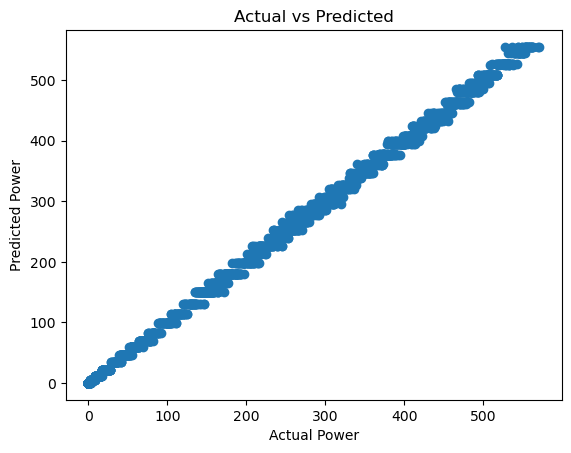

In [24]:
plt.scatter(y_test,y_predict)
plt.xlabel('Actual Power')
plt.ylabel('Predicted Power')
plt.title('Actual vs Predicted')
plt.show()

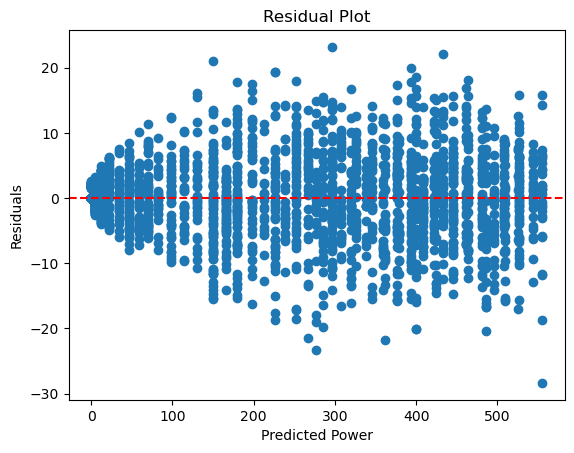

In [29]:
residuals = y_test - y_predict
plt.scatter(y_predict, residuals)
plt.xlabel('Predicted Power')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()